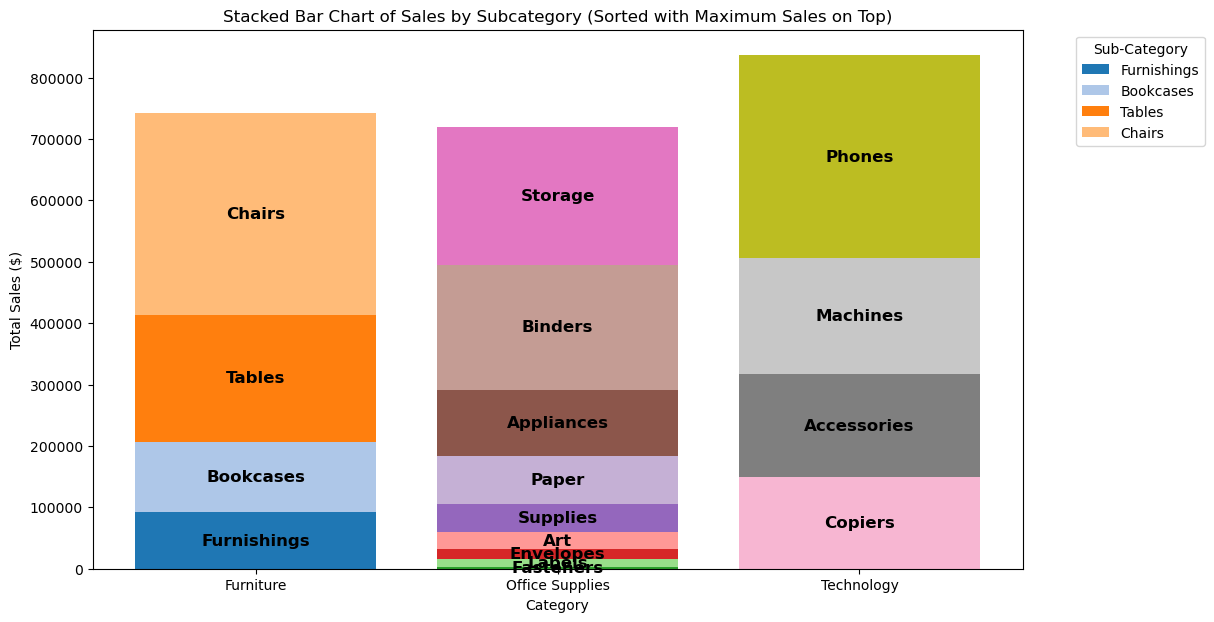

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/gangl/Documents/Python Scripts/Superstore_Sales.csv') 

# Convert 'Date' column to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Year'] = df['Order_Date'].dt.year

# Group by 'Order_Year' and 'Category' to calculate total sales per year for each category
yearly_sales_summary = df.groupby(['Order_Year', 'Category'])['Sales'].sum().reset_index()

subcategory_sales = df.groupby(['Category', 'Sub_Category'])['Sales'].sum().reset_index()

# Sort subcategories within each category by sales (ascending order, so max is on top)
subcategory_sales_sorted = subcategory_sales.sort_values(['Category', 'Sales'], ascending=[True, True])

# Extract unique categories
categories = subcategory_sales_sorted['Category'].unique()

# Define colors for each subcategory
subcategories = subcategory_sales_sorted['Sub_Category'].unique()
colors = sns.color_palette("tab20", len(subcategories))
subcategory_color_map = dict(zip(subcategories, colors))

# Track bottom heights for stacking
bottom_heights = {category: 0 for category in categories}

# Create the stacked bar chart
plt.figure(figsize=(12, 7))

# Iterate through each category and plot subcategories in ascending order (to place max on top)
for category in categories:
    category_data = subcategory_sales_sorted[subcategory_sales_sorted['Category'] == category]
    
    for i, row in category_data.iterrows():
        plt.bar(row['Category'], row['Sales'], bottom=bottom_heights[row['Category']], 
                label=row['Sub_Category'] if category == categories[0] else "", color=subcategory_color_map[row['Sub_Category']])
        
        # Add subcategory labels
        plt.text(row['Category'], bottom_heights[row['Category']] + row['Sales'] / 2, row['Sub_Category'],
                 ha='center', va='center', fontsize=12, color='black', fontweight='bold')
        
        # Update bottom heights for stacking
        bottom_heights[row['Category']] += row['Sales']

# Customize plot
plt.xlabel("Category")
plt.ylabel("Total Sales ($)")
plt.title("Stacked Bar Chart of Sales by Subcategory (Sorted with Maximum Sales on Top)")
plt.xticks(categories)  # Show all categories
plt.legend(title="Sub-Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.savefig("Stacked Bar Chart for Each Category.png", dpi=300, bbox_inches="tight") 
plt.show()